Importing the Necessary Packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Loading the Cleaned Data

In [5]:
df = pd.read_csv('preprocessed_telecom_xdr_data.csv')
df.head()

,Bearer Id,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.000000,5.000000,23.0,44.0,...,15.854611,2.501332,8.198936,9.656251,278.082303,8.291642,171.744450,8.814393,36.749741,308.879636
1,1.311448e+19,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,...,11.615936,11.012071,18.338413,17.227132,608.750074,1.170709,526.904238,8.265995,41.141921,653.384965
2,1.311448e+19,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,106.199942,17.628232,6.0,9.0,...,19.725661,14.699576,17.587794,6.163408,229.584621,0.395630,410.692588,4.215763,27.883638,279.807335
3,1.311448e+19,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,106.199942,17.628232,44.0,44.0,...,11.615944,15.146643,13.994646,1.097942,423.466644,10.849722,421.861730,12.797283,43.324218,455.940801
4,1.311448e+19,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,106.199942,17.628232,6.0,9.0,...,15.259380,11.012071,17.124581,0.415218,527.707248,3.529801,550.709500,13.910322,38.542814,569.138589


Identifying Top 10 Handsets

In [6]:
# Identify the top 10 handsets
top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                14002
Apple iPhone 6S (A1688)          8806
Apple iPhone 6 (A1586)           8287
undefined                        8119
Apple iPhone 7 (A1778)           5740
Apple iPhone Se (A1723)          4865
Apple iPhone 8 (A1905)           4586
Apple iPhone Xr (A2105)          4183
Samsung Galaxy S8 (Sm-G950F)     3889
Samsung Galaxy J5 (Sm-J530)      3529
Name: count, dtype: int64


Identifying Top 3 Manufacturers

In [7]:
# Identify the top 3 manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_3_manufacturers)


Handset Manufacturer
Apple      54711
Samsung    36437
Huawei     26385
Name: count, dtype: int64


 Top 5 Handsets Per Top 3 Manufacturers

In [9]:
for manufacturer in top_3_manufacturers.index:
    top_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"Top 5 handsets for {manufacturer}:\n{top_handsets}\n")


Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    8806
Apple iPhone 6 (A1586)     8287
Apple iPhone 7 (A1778)     5740
Apple iPhone Se (A1723)    4865
Apple iPhone 8 (A1905)     4586
Name: count, dtype: int64

Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    3889
Samsung Galaxy J5 (Sm-J530)     3529
Samsung Galaxy A5 Sm-A520F      3400
Samsung Galaxy J3 (Sm-J330)     3256
Samsung Galaxy S7 (Sm-G930X)    2834
Name: count, dtype: int64

Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  14002
Huawei P20 Lite Huawei Nova 3E     1834
Huawei E5180                       1420
Huawei P20                         1281
Huawei Y6 2018                      937
Name: count, dtype: int64



Aggregating User Behavior Data (Task 1.1)

In [18]:
agg_df = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',    # Total session duration
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()


In [19]:
agg_df.head()

,MSISDN/Number,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
0,3.360100e+10,1,116720.0,455.940801,36.053108,2.206504,0.025631,14.900201,6.724347,10.265105,16.915876,3.337123,1.051882,0.837400,0.493962,423.466906,1.367528,377.096990,9.473882
1,3.360100e+10,1,181230.0,120.755184,36.104459,2.598548,0.032917,5.324251,7.107972,0.770569,10.451194,4.197697,1.137166,2.828821,0.478960,105.035298,8.291642,279.557701,2.152370
2,3.360100e+10,1,134969.0,556.659663,39.306820,1.793856,0.047619,2.137272,11.012071,16.525919,2.827981,3.343483,0.099643,2.436500,0.768880,529.068485,9.759228,495.086501,6.607171
3,3.360101e+10,1,49878.0,401.993172,20.327526,0.251469,0.028825,4.393123,2.584198,1.157362,0.784730,5.937765,2.054212,2.178618,0.106052,388.074835,3.051292,25.248001,10.031701
4,3.360101e+10,2,37104.0,1003.036989,79.623348,2.861230,0.051312,10.339971,31.193031,15.436794,24.230077,13.728668,4.770948,2.247808,0.612155,932.709968,5.816727,777.643713,27.160771


In [21]:
agg_df.shape

(98106, 19)

Task 1.2

In [22]:
print(agg_df.describe())

       MSISDN/Number     Bearer Id     Dur. (ms)  Total DL (Bytes)  \
count   9.810600e+04  98106.000000  9.810600e+04      98106.000000   
mean    4.613497e+10      1.327564  1.440315e+05        532.523598   
std     3.015524e+12      0.699227  1.743823e+05        356.368758   
min     3.360100e+10      1.000000  7.142000e+03          8.827082   
25%     3.365079e+10      1.000000  7.382675e+04        305.495724   
50%     3.366363e+10      1.000000  1.047065e+05        455.940801   
75%     3.368348e+10      1.000000  1.727990e+05        670.635376   
max     8.823971e+14     17.000000  1.855375e+07       6642.129198   

       Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
count      98106.000000             98106.000000             98106.000000   
mean          51.255372                 2.079501                 0.038114   
std           28.615352                 1.442322                 0.026436   
min           13.118872                 0.000012             

1. Variable Transformations

Segment users into the top five decile classes based on total session duration.
Compute total data (DL + UL) per decile class.

In [25]:
# Segment users into top five decile classes based on total session duration
agg_df['Total_Duration'] = agg_df['Dur. (ms)']
agg_df['Total_Data_Volume'] = agg_df['Total DL (Bytes)'] + agg_df['Total UL (Bytes)']

# Create deciles based on total duration
agg_df['Duration_Decile'] = pd.qcut(agg_df['Total_Duration'], q=5, labels=False)

# Compute total data per decile class
decile_data = agg_df.groupby('Duration_Decile').agg({
    'Total_Data_Volume': 'sum',
    'Total_Duration': 'mean'
}).reset_index()

print(decile_data)


   Duration_Decile  Total_Data_Volume  Total_Duration
0                0       9.343976e+06    31142.889665
1                1       9.420516e+06    79600.914535
2                2       9.748176e+06   107221.829918
3                3       1.094274e+07   160632.054228
4                4       1.781682e+07   341566.852760


2. Basic Metrics (Mean, Median, etc.)


In [26]:
# Analyze basic metrics for key columns
basic_metrics = agg_df[['Total_Duration', 'Total_Data_Volume', 'Total DL (Bytes)', 'Total UL (Bytes)']].describe()

# Display basic metrics
print(basic_metrics)

# Interpretation: Mean, median, min, max, and std help us understand the spread and central tendencies of key variables,
# which is essential for detecting anomalies and understanding user behavior.


       Total_Duration  Total_Data_Volume  Total DL (Bytes)  Total UL (Bytes)
count    9.810600e+04       98106.000000      98106.000000      98106.000000
mean     1.440315e+05         583.778970        532.523598         51.255372
std      1.743823e+05         377.923282        356.368758         28.615352
min      7.142000e+03          33.249009          8.827082         13.118872
25%      7.382675e+04         346.120022        305.495724         36.037528
50%      1.047065e+05         503.150269        455.940801         41.393259
75%      1.727990e+05         716.875323        670.635376         52.317074
max      1.855375e+07        7320.177425       6642.129198        678.048227


3. Non-Graphical Univariate Analysis

In [27]:
# Dispersion parameters (variance, std)
dispersion_params = agg_df[['Total_Duration', 'Total_Data_Volume', 'Total DL (Bytes)', 'Total UL (Bytes)',
                            'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                            'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 
                            'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                            'Other DL (Bytes)', 'Other UL (Bytes)']].agg(['var', 'std'])

print(dispersion_params)

# Interpretation: The standard deviation indicates the average deviation from the mean,
# while variance shows how spread out the data points are. A higher variance indicates greater disparity in data usage.


     Total_Duration  Total_Data_Volume  Total DL (Bytes)  Total UL (Bytes)  \
var    3.040918e+10      142826.007110     126998.691595        818.838353   
std    1.743823e+05         377.923282        356.368758         28.615352   

     Social Media DL (Bytes)  Social Media UL (Bytes)  Youtube DL (Bytes)  \
var                 2.080292                 0.000699           88.419274   
std                 1.442322                 0.026436            9.403152   

     Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
var           78.688236            87.97033           78.479935   
std            8.870639             9.37925            8.858890   

     Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  \
var          21.472759           2.738072           2.08502          0.141441   
std           4.633871           1.654712           1.44396          0.376086   

     Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  
var    

4. Graphical Univariate Analysis

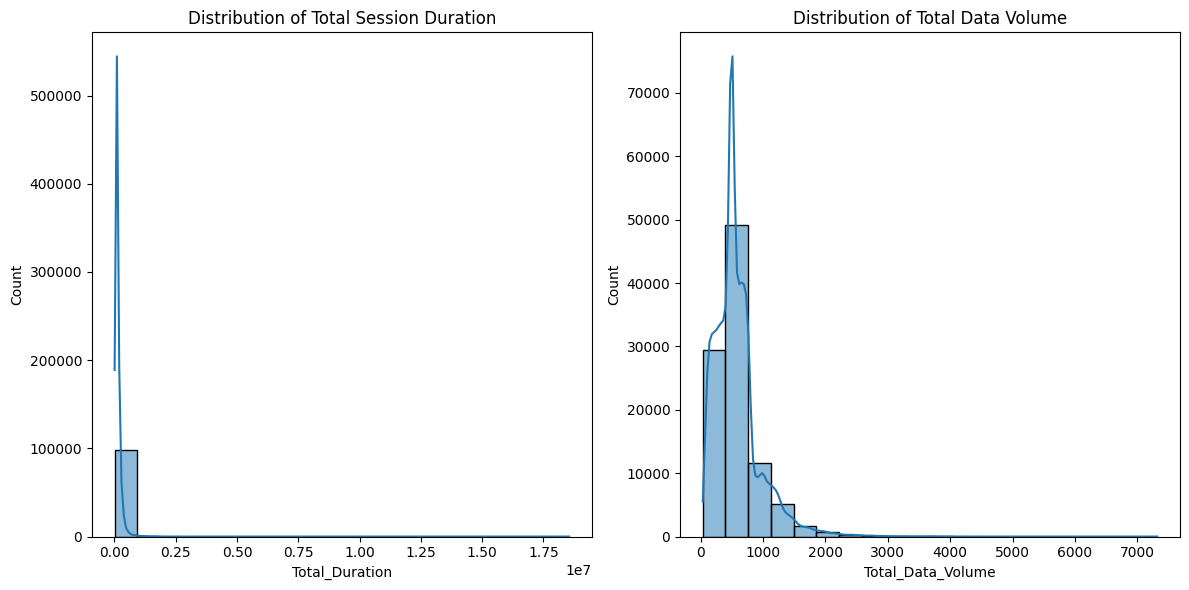

In [43]:

# Plot histograms for data volume and session duration
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(agg_df['Total_Duration'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Total Session Duration')
sns.histplot(agg_df['Total_Data_Volume'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Distribution of Total Data Volume')

plt.tight_layout()
plt.show()

# Interpretation: Histograms provide insights into the distribution of session duration and total data volume.
# A right-skewed distribution may indicate that a few users have significantly longer sessions or higher data usage.


5. Bivariate Analysis

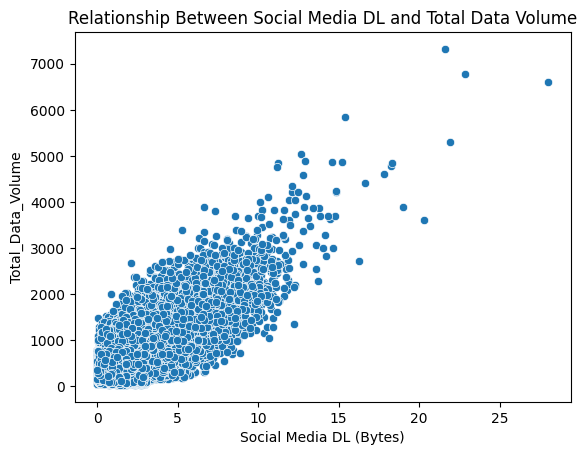

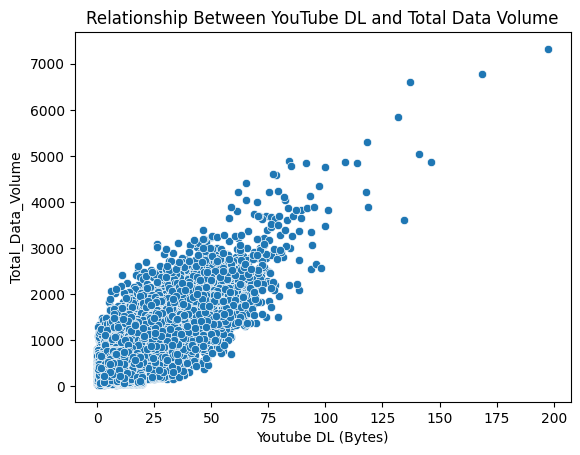

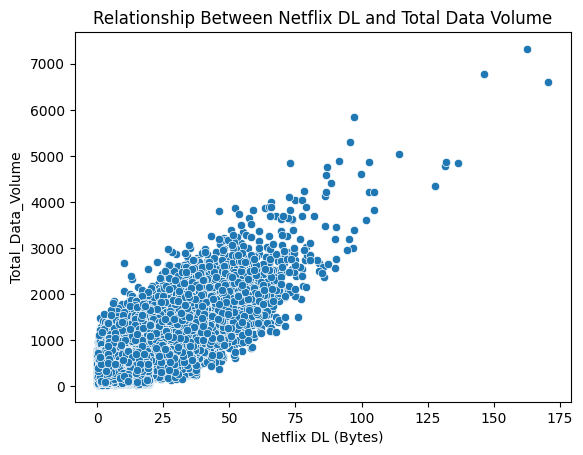

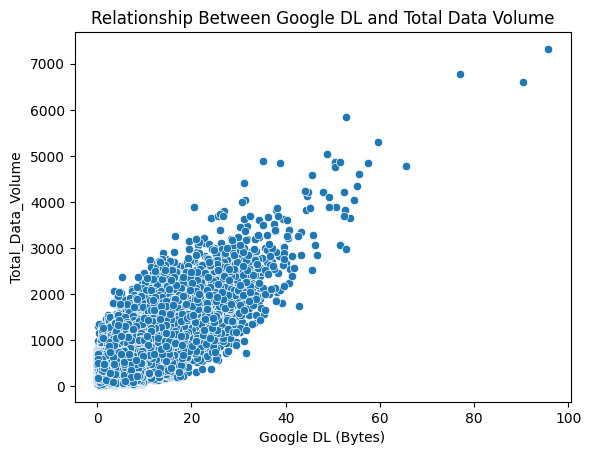

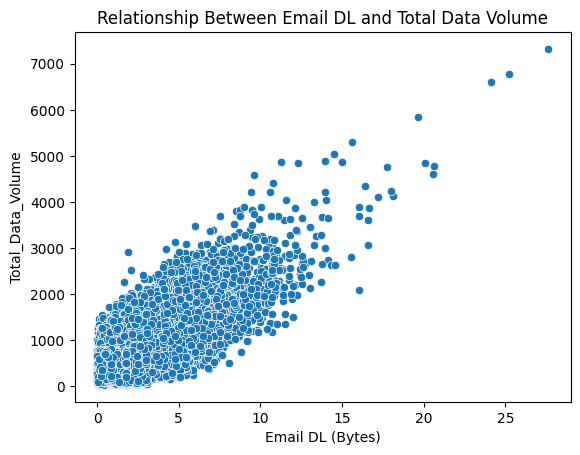

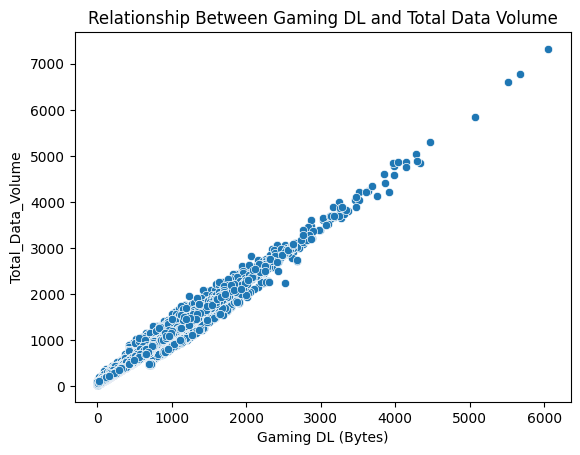

In [32]:
# Scatter plot for relationship between Social Media data and total data
sns.scatterplot(data=agg_df, x='Social Media DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Social Media DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Youtube DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between YouTube DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Netflix DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Netflix DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Google DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Google DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Email DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Email DL and Total Data Volume')
plt.show()

# Repeat for other applications
sns.scatterplot(data=agg_df, x='Gaming DL (Bytes)', y='Total_Data_Volume')
plt.title('Relationship Between Gaming DL and Total Data Volume')
plt.show()

# Interpretation: Scatter plots reveal the relationships between each application's data usage and the total data volume.
# Strong correlations are visualized by tight clustering of points.


6. Correlation Analysis

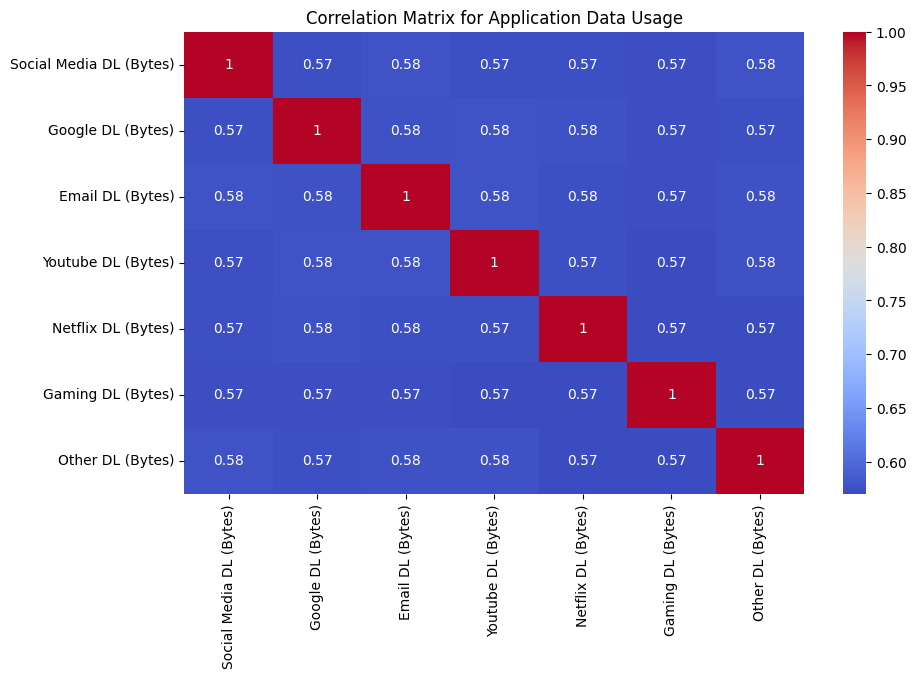

In [34]:
# Compute correlation matrix
app_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 
               'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

corr_matrix = agg_df[app_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Application Data Usage')
plt.show()

# Interpretation: The correlation matrix shows the degree of association between different applications' data usage.
# Strong positive correlations suggest that users tend to use multiple services together.


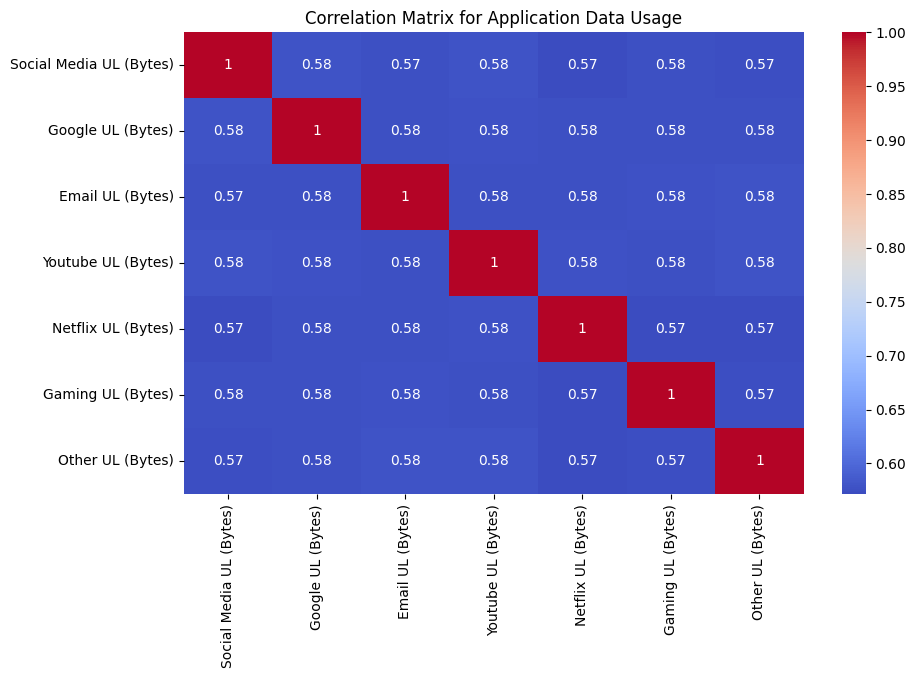

In [37]:
# Compute correlation matrix
app_columns = ['Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)', 
               'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']

corr_matrix = agg_df[app_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Application Data Usage')
plt.show()


In [39]:
# Dimensionality Reduction - PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agg_df[['Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 
                                           'Google DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 
                                           'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Interpretation of PCA
print("Explained variance by components:", pca.explained_variance_ratio_)

Explained variance by components: [0.6656155 0.0795291]
